netCDF (network common Data Form, por sus siglas en inglés) es una interfaz para datos orientados a arreglos, además de, una librería que contiene implementaciones para la interfaz.
Este formato ha sido utilizado ampliamente por la comunidad científica para almacenar, por ejemplo, datos atmosféricos, climáticos, oceánicos, etc. 

Lo primero es habilitar la paquetería utilizando la sentencia "using NetCDF" y descargar los datos que utilizaremos.
https://drive.google.com/open?id=0B49PM3pXfi7qLU0wSEVhUklPWlE

In [2]:
using NetCDF

Usaremos datos de OLR (outgoing large radiation,por sus siglas en inglés), ésta es usada en la meteorología para identificar procesos convectivos. La relación OLR-Convección tiene su base en lo siguiente: La radiación de onda larga emitida por la superficie del océano es absorbida por el vapor de agua (VA) y el condensado (gotas de agua o hielo), ya que la OLR depende de la temperatura del VA, y ésta a su vez está en función de la altura, hace que, la OLR sea una medida integrada de la distribución del VP con la altura.

La OLR es medida en grados Kelvin y tiene relación inversa con la convección.

Se puede utilizar la siguiente aproximación.

OLR menor a 240 Convección
OLR  mayor 250 Cielo despejado

Le asignamos un nombre a "olr.1x.7916.nc" ya que lo estaremos utilizando y usaremos el comando "ncinfo" para obtener información de las variables dentro del archivo.

In [3]:
olrdata="olr.1x.7916.nc";

In [4]:
ncinfo(olrdata)

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------



##### NetCDF File #####

/home/leox/proyectoj/Taller-I/olr.1x.7916.nc

##### Dimensions #####

Name                                                Length                    
lat                                                 73                        
time                                                UNLIMITED (13631 current..
lon                                                 144                       

##### Variables #####

Name                            Type            Dimensions                      

##### Attributes #####

Variable            Name                Value                                   
global              history             Sun May  1 10:52:08 2016: Make origina..
global              source_file_info    577736304 May 1 10:51 /data8/olr.1x.79..
global              title               NOAA OLR                                
global              source_file         /data8/olr.1x.7916.b                    
lat                 units               degrees_north

Ahora usaremos el comando "ncread" para asignirles un nombre a los datos de longitud, latitud y olr. 

In [5]:
lat=ncread(olrdata,"lat");
lon=ncread(olrdata,"lon");
olr=ncread(olrdata,"olr");

lat                             FLOAT           lat                             
olr                             FLOAT           lon lat time                    
time                            DOUBLE          time                            
lon                             FLOAT           lon                             
--------------------------------------------------------------------------------


Para graficar utilizaremos la paquetería "PyPlot" y el comando "pcolor".

In [6]:
using PyPlot

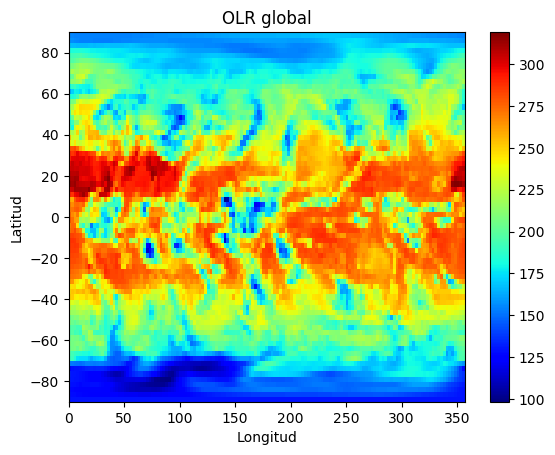

PyObject <matplotlib.text.Text object at 0x7f0ead53f290>

In [7]:
pcolor(lon,lat,olr[:,:,100]',cmap=ColorMap("jet")); colorbar(); title("OLR global"); ylabel("Latitud"); xlabel("Longitud")

También podemos hacer un diagrama Hovmöller útil en meteolorgía para ver cómo se propaga algún fenómeno. En éste ejemplo, almacenaremos en la variable "HM" medio año (180 días) de datos a lo largo del Ecuador, con el fin de ver algún patrón.

In [8]:
HM=zeros(180,length(lon));
for i in (1:1:180)
     HM[i,:]=olr[:,37,i];
end


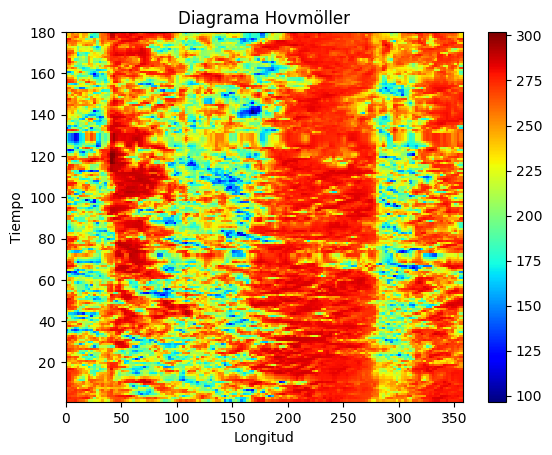

PyObject <matplotlib.text.Text object at 0x7f0eace30210>

In [9]:
pcolor(lon,180:-1:1,HM,cmap=ColorMap("jet")); colorbar(); title("Diagrama Hovmöller"); xlabel("Longitud"); ylabel("Tiempo")

Gracias

Referencias

Graham, N. E., & Barnett, T. P. (1987). Sea surface temperature, surface wind divergence, and convection over tropical oceans. Science, 238(4827), 657-659.